# Implementation of Custom Loss Function Analysis

In [1]:
import torch
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import imageio
import numpy as np

## 20 epochs training, Lerning Rate 0.001

In [2]:
# Load the file
pt_file_cw0 = torch.load("20epochs_lr0001/phydnet_results_clw_0_0ep-3.pt")
pt_file_cw00005 = torch.load("20epochs_lr0001/phydnet_results_clw_00005_0ep-0.pt")
pt_file_cw0001 = torch.load("20epochs_lr0001/phydnet_results_clw_0001_0ep-1.pt")
pt_file_cw001 = torch.load("20epochs_lr0001/phydnet_results_clw_001_0ep-4.pt")
pt_file_trues = torch.load("20epochs_lr0001/phydnet_results_clw_0_0ep-3.pt")
# files = [pt_file_cw0, pt_file_cw00005, pt_file_cw0001, pt_file_cw001]
files = {'0':pt_file_cw0,
         '00005':pt_file_cw00005,
         '0001':pt_file_cw0001,
         '001':pt_file_cw001,
}

In [3]:
def get_list_of_increases(file, preds_trues='preds'):
    # take run 0
    preds = file[preds_trues][0]

    list_of_increases=[]
    for i in range(1, len(preds)):
        x = [x for x in range(37)]

        # positive number means the fuel density increased between 2 frames
        difference_2_frames = np.array(preds[i][0] - preds[i-1][0])

        # calc. sum of increases between two
        sum_of_increases = np.where(difference_2_frames>0, difference_2_frames, 0).sum()

        list_of_increases.append(sum_of_increases)
    return x, list_of_increases

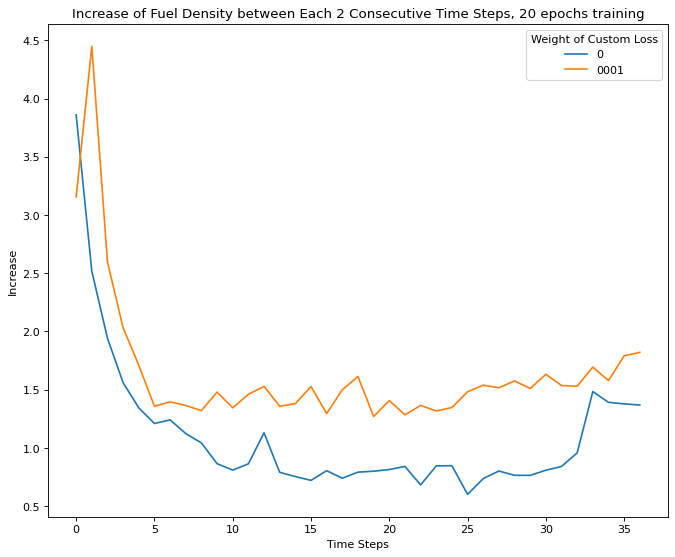

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)


ax = plt.axes()
for weight, file in files.items():
    x, y = get_list_of_increases(file)
    ax.plot(x, y, label=weight)
plt.title('Increase of Fuel Density between Each 2 Consecutive Time Steps, 20 epochs training')
plt.xlabel('Time Steps')
plt.ylabel('Increase')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig(f'mae.png')

plt.legend(title='Weight of Custom Loss')
plt.show()

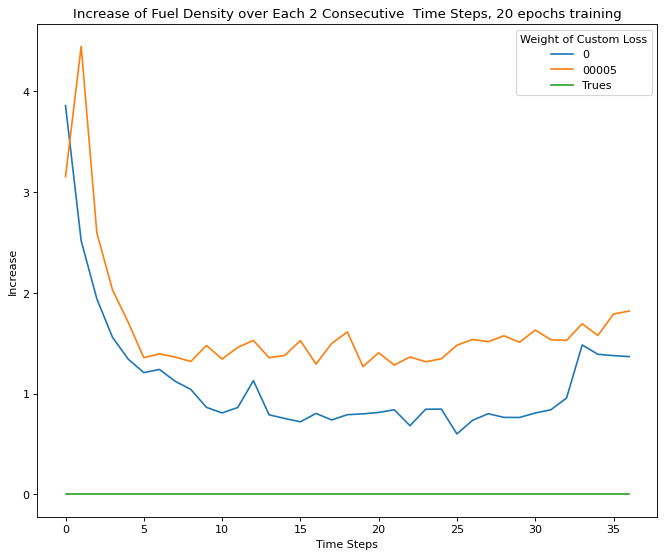

In [14]:

files = {'0':pt_file_cw0,
         '00005':pt_file_cw00005,
        }
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

ax = plt.axes()
for weight, file in files.items():
    x, y = get_list_of_increases(file)
    ax.plot(x, y, label=weight)
x, y = get_list_of_increases(pt_file_trues, 'trues')
ax.plot(x, y, label='Trues')
plt.title('Increase of Fuel Density over Each 2 Consecutive  Time Steps, 20 epochs training')
plt.xlabel('Time Steps')
plt.ylabel('Increase')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig(f'mae.png')

plt.legend(title='Weight of Custom Loss')
plt.show()

## 50 epochs training, Lerning Rate 0.001

In [6]:
# Load the file
pt_file_cw0 = torch.load("50epochs_lr0001/phydnet_results_3d1e1604-594b-4364-a9a5-30b52a0_nhpjw_cl0.pt")
pt_file_cw00005 = torch.load("50epochs_lr0001/phydnet_results_68660dc9-f6ad-49ed-8d9a-57c6fb0_vf6d9_cl00005.pt")
pt_file_trues = torch.load("50epochs_lr0001/phydnet_results_3d1e1604-594b-4364-a9a5-30b52a0_nhpjw_cl0.pt")
# files = [pt_file_cw0, pt_file_cw00005, pt_file_cw0001, pt_file_cw001]
files = {'0':pt_file_cw0,
         '00005':pt_file_cw00005,
}

In [7]:
def get_list_of_increases(file, preds_trues='preds'):
    # take run 0
    preds = file[preds_trues][0]

    list_of_increases=[]
    for i in range(1, len(preds)):
        x = [x for x in range(37)]

        # positive number means the fuel density increased between 2 frames
        difference_2_frames = np.array(preds[i][0] - preds[i-1][0])

        # calc. sum of increases between two
        sum_of_increases = np.where(difference_2_frames>0, difference_2_frames, 0).sum()

        list_of_increases.append(sum_of_increases)
    return x, list_of_increases

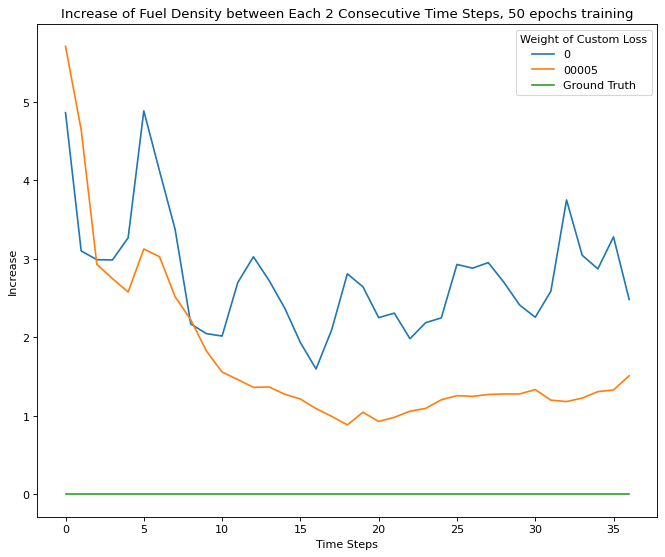

In [8]:

files = {'0':pt_file_cw0,
         '00005':pt_file_cw00005,
        }
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

ax = plt.axes()
for weight, file in files.items():
    x, y = get_list_of_increases(file)
    ax.plot(x, y, label=weight)
x, y = get_list_of_increases(pt_file_trues, 'trues')
ax.plot(x, y, label='Ground Truth')
plt.title('Increase of Fuel Density between Each 2 Consecutive Time Steps, 50 epochs training')
plt.xlabel('Time Steps')
plt.ylabel('Increase')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig(f'mae.png')

plt.legend(title='Weight of Custom Loss')
plt.show()

### No Penalty Applied  (weight 0)

<img src="50epochs_lr0001/movie_3d1e1604-594b-4364-a9a5-30b52a0_nhpjw_cl0.gif" width="650" align="left">

### Penalty Applied  (weight 0.0005)

<img src="50epochs_lr0001/movie_68660dc9-f6ad-49ed-8d9a-57c6fb0_vf6d9_cl00005.gif" width="650" align="left">

## 60 epochs training, Lerning Rate 0.0005

In [9]:
# Load the file
pt_file_cw0 = torch.load("60epochs_lr00005/phydnet_results_d9864_d7f-0_cw0.pt")
pt_file_cw00005 = torch.load("60epochs_lr00005/phydnet_results_64888_d7f-2_cw00005.pt")
pt_file_cw0001 = torch.load("60epochs_lr00005/phydnet_results_34bfc_d7f-1_cw0001.pt")
pt_file_trues = torch.load("60epochs_lr00005/phydnet_results_d9864_d7f-0_cw0.pt")
# files = [pt_file_cw0, pt_file_cw00005, pt_file_cw0001, pt_file_cw001]
files = {'0':pt_file_cw0,
         '00005':pt_file_cw00005,
         '0001':pt_file_cw0001,
}

In [10]:
def get_list_of_increases(file, preds_trues='preds'):
    # take run 0
    preds = file[preds_trues][0]

    list_of_increases=[]
    for i in range(1, len(preds)):
        x = [x for x in range(37)]

        # positive number means the fuel density increased between 2 frames
        difference_2_frames = np.array(preds[i][0] - preds[i-1][0])

        # calc. sum of increases between two
        sum_of_increases = np.where(difference_2_frames>0, difference_2_frames, 0).sum()

        list_of_increases.append(sum_of_increases)
    return x, list_of_increases

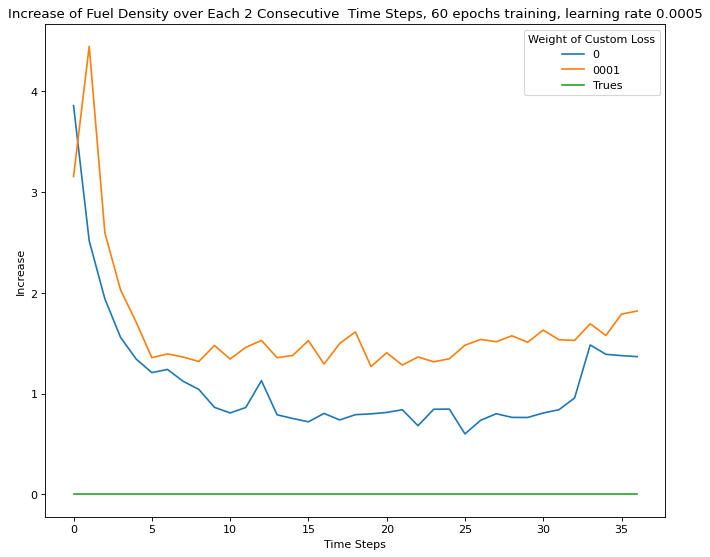

In [17]:

files = {'0':pt_file_cw0,
         '0001':pt_file_cw00005,
        }
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

ax = plt.axes()
for weight, file in files.items():
    x, y = get_list_of_increases(file)
    ax.plot(x, y, label=weight)
x, y = get_list_of_increases(pt_file_trues, 'trues')
ax.plot(x, y, label='Trues')
plt.title('Increase of Fuel Density over Each 2 Consecutive  Time Steps, 60 epochs training, learning rate 0.0005')
plt.xlabel('Time Steps')
plt.ylabel('Increase')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig(f'mae.png')

plt.legend(title='Weight of Custom Loss')
plt.show()